In [24]:
import os
import random
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# set the float format to display 2 decimal places
pd.options.display.float_format = '{:.2f}'.format

In [25]:
# filter for one week of data
# start_date = '2021-08-22' AND end_date = '2021-08-30' 

week_df = pd.read_csv("one_week_df_lanes.csv")
week_df.head()

,Unnamed: 0,ID,SPEED,TRAVEL_TIME,LINK_ID,LINK_POINTS,ENCODED_POLY_LINE,BOROUGH,LINK_NAME,MAX_LANES
0,0,441,56.54,139.00,4616201.00,"40.56058,-74.199581 40.568141,-74.192011 40.57...",s~pvFjb{cMgn@in@cK{F}JwBwIUyGp@qFv@qG\\\\\\|@w...,Staten Island,WSE S VICTORY BOULEVARD - ARDEN AVENUE,unknown
1,1,436,58.40,89.00,4616202.00,"40.56058,-74.199581 40.55926,-74.20113 40.5584...",s~pvFjb{cMfGtHxCrFvB~FdBhGrFz\t@`DpC~JpCnHpBhE...,Staten Island,WSE S ARDEN AVENUE - BLOOMINGDALE ROAD,unknown
2,2,418,41.63,51.00,4616205.00,"40.60425,-74.052321 40.6038804,-74.053491 40.6...",qoyvF~i~bMhAhF`ArEdAtEbDtNp@lDRvDKrDc@~Dm@bFy@...,Staten Island,VNB W-SIE W SI GANTRY LOWER LEVEL - FINGERBOAR...,4
3,3,385,45.98,31.00,4616208.00,"40.6077805,-74.14091 40.60826,-74.132101",sezvFtsocM_Bav@,Staten Island,SIE W BRADLEY AVENUE - WOOLEY AVENUE,unknown
4,4,390,57.16,69.00,4616209.00,"40.6152105,-74.157401 40.61231,-74.15362 40.60...",at{vFvzrcMbQsVlP{UjCkFbBsFxAkJ\{HKiS,Staten Island,SIE W WOOLEY AVENUE - RICHMOND AVENUE,4


In [26]:
print(f"len of week df is -- {len(week_df)}")

len of week df is -- 254956


In [27]:
index = 1
print(week_df.iloc[index])
print('\n\n')
print(week_df.iloc[index].ENCODED_POLY_LINE)
print('\n\n')

Unnamed: 0                                                           1
ID                                                                 436
SPEED                                                            58.40
TRAVEL_TIME                                                      89.00
LINK_ID                                                     4616202.00
LINK_POINTS          40.56058,-74.199581 40.55926,-74.20113 40.5584...
ENCODED_POLY_LINE    s~pvFjb{cMfGtHxCrFvB~FdBhGrFz\t@`DpC~JpCnHpBhE...
BOROUGH                                                  Staten Island
LINK_NAME                       WSE S ARDEN AVENUE - BLOOMINGDALE ROAD
MAX_LANES                                                      unknown
Name: 1, dtype: object



s~pvFjb{cMfGtHxCrFvB~FdBhGrFz\t@`DpC~JpCnHpBhE\\\\\\|DlGnEbGxDxDzMdL





In [28]:
# Print the unique number of Link IDs 
print(f"Number of unique Link IDs: {len(week_df.LINK_ID.unique())}")

# Print the unique number of Link Names 
print(f"Number of unique Link Names: {len(week_df.LINK_NAME.unique())}")

# Print the unique number of Link Points
print(f"Number of unique Link Points: {len(week_df.LINK_POINTS.unique())}")

# Print the unique number of IDs
print(f"Number of unique IDs: {len(week_df.ID.unique())}")

# Print the length of the DataFrame
print(f"Length of week_df DataFrame: {len(week_df)}")

# Print the unique number of boroughs
print(f"Number of unique boroughs : {len(week_df.BOROUGH.unique())}")


Number of unique Link IDs: 137
Number of unique Link Names: 137
Number of unique Link Points: 135
Number of unique IDs: 137
Length of week_df DataFrame: 254956
Number of unique boroughs : 6


In [29]:
wdf_ = week_df.drop(['Unnamed: 0','LINK_ID', 'LINK_POINTS', 'LINK_NAME','ENCODED_POLY_LINE'], axis=1)
wdf_.head()

,ID,SPEED,TRAVEL_TIME,BOROUGH,MAX_LANES
0,441,56.54,139.00,Staten Island,unknown
1,436,58.40,89.00,Staten Island,unknown
2,418,41.63,51.00,Staten Island,4
3,385,45.98,31.00,Staten Island,unknown
4,390,57.16,69.00,Staten Island,4


In [30]:
# Print the unique lanes and their description
unique_lanes = wdf_['MAX_LANES'].unique()
print(f"Unique lanes in wdf_: {unique_lanes}\n")

# Print the lane counts and their description
lane_counts = wdf_['MAX_LANES'].value_counts()
print(f"Lane counts in wdf_: \n{lane_counts}")

Unique lanes in wdf_: ['unknown' '4' '3' '2' nan '5' '1']

Lane counts in wdf_: 
unknown    128202
3           49399
4           27869
2           16390
5            3698
1             633
Name: MAX_LANES, dtype: int64


In [31]:
# Remove rows with 'unknown', '1' and NaN values from DataFrame 'wdf_'
wdf = wdf_[~wdf_['MAX_LANES'].isin(['unknown'])]
wdf = wdf[~wdf['MAX_LANES'].isin(['1'])]
wdf = wdf.dropna(subset=['MAX_LANES'])

# Print the unique lanes and their description
unique_lanes = wdf['MAX_LANES'].unique()
print(f"Unique lanes in modified DataFrame 'wdf': {unique_lanes}")

Unique lanes in modified DataFrame 'wdf': ['4' '3' '2' '5']


In [32]:
# Set random seed
np.random.seed(7)

# Group by MAX_LANES and apply random sampling
data = wdf.groupby('MAX_LANES').apply(lambda x: x.sample(n=3000, random_state=7))
data = data.reset_index(drop=True)

# Print the value counts of MAX_LANES in the sampled DataFrame
print(f"Value counts of MAX_LANES in the sampled DataFrame: \n{data['MAX_LANES'].value_counts()}")
print(f"\nLength of the DataFrame is: {len(data)}")

Value counts of MAX_LANES in the sampled DataFrame: 
2    3000
3    3000
4    3000
5    3000
Name: MAX_LANES, dtype: int64

Length of the DataFrame is: 12000


In [33]:
data.head()

,ID,SPEED,TRAVEL_TIME,BOROUGH,MAX_LANES
0,349,0.00,0.00,Staten Island,2
1,440,54.68,141.00,Staten Island,2
2,349,0.00,0.00,Staten Island,2
3,413,48.46,44.00,Brooklyn,2
4,345,11.18,381.00,Bronx,2


__* SPEED COLUMN__

In [34]:
stats = data['SPEED'].describe()
print(stats)

count   12000.00
mean       32.82
std        19.48
min         0.00
25%        13.04
50%        38.52
75%        49.08
max        72.70
Name: SPEED, dtype: float64


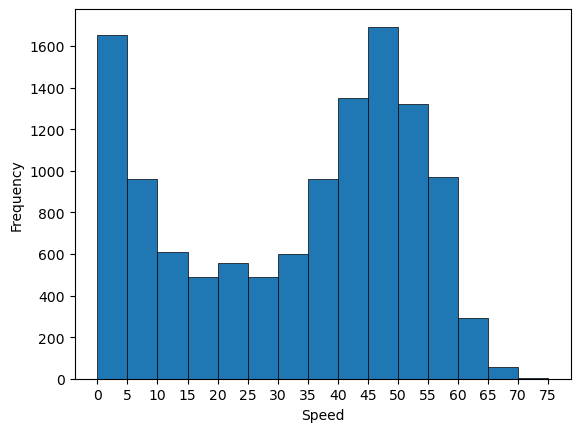

In [35]:
# Histogram to visualize the distribution of the speed values. A histogram shows how many values fall into each bin or range of values.
# create a histogram of the 'SPEED' column with bin interval of 5
plt.hist(data['SPEED'], bins=range(int(data['SPEED'].min()), int(data['SPEED'].max()) + 5, 5), edgecolor='black', linewidth=0.5)
plt.xlabel('Speed')
plt.ylabel('Frequency')

# set the x-axis tick marks to be at intervals of 5
plt.xticks(range(0, int(data['SPEED'].max()) + 5, 5))

plt.show()

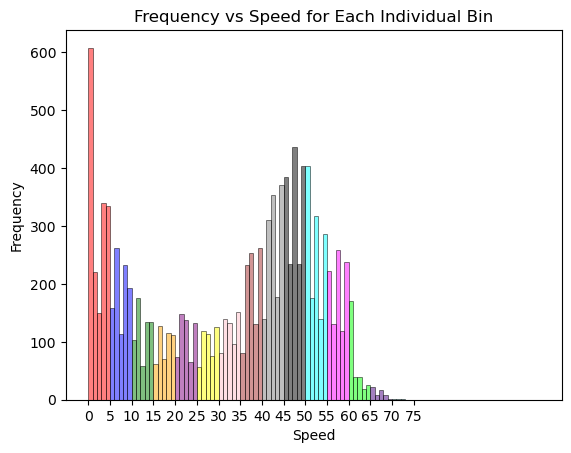

In [36]:
# create a list of bin colors
bin_colors = ['red', 'blue', 'green', 'orange', 'purple', 'yellow', 'pink', 'brown', 'gray', 'black', 'cyan', 'magenta', 'lime', 'indigo', 'teal', 'navy', 'maroon', 'olive', 'coral', 'salmon']

# create separate histograms for each bin with a different color
for i in range(20):
    plt.hist(data[data['SPEED'].between(i*5, (i+1)*5)]['SPEED'], bins=range(i*5, (i+2)*5, 1), alpha=0.5, color=bin_colors[i],  edgecolor='black', linewidth=0.7)

# set the x-axis tick marks to be at intervals of 5
plt.xticks(range(0, int(data['SPEED'].max()) + 5, 5))

plt.xlabel('Speed')
plt.ylabel('Frequency')
plt.title('Frequency vs Speed for Each Individual Bin')
plt.show()

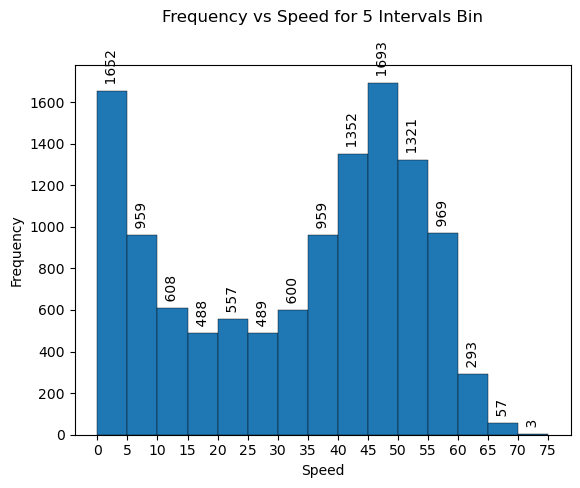

In [37]:
# create a histogram of the 'SPEED' column with bin interval of 5
hist, bins, _ = plt.hist(data['SPEED'], bins=range(int(data['SPEED'].min()), int(data['SPEED'].max()) + 5, 5), edgecolor='black', linewidth=0.3)
plt.xlabel('Speed')
plt.ylabel('Frequency')
plt.title('Frequency vs Speed for 5 Intervals Bin\n\n')
# set the x-axis tick marks to be at intervals of 5
plt.xticks(range(0, int(data['SPEED'].max()) + 5, 5))

# add count on top of each histogram bar
for i in range(len(hist)):
    space = "\u200a"+"\u200a"+"\u200a"+"\u200a"
    plt.text(bins[i] + 2.5, hist[i] + 5, space+str(int(hist[i])), rotation='vertical', ha='center', va='bottom')

plt.show()

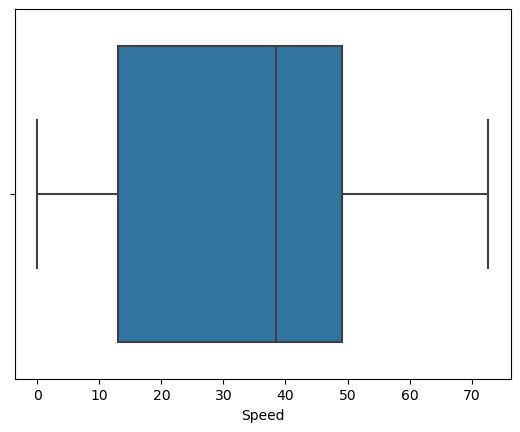

In [38]:
sns.boxplot(x=data['SPEED'])
plt.xlabel('Speed')
plt.show()

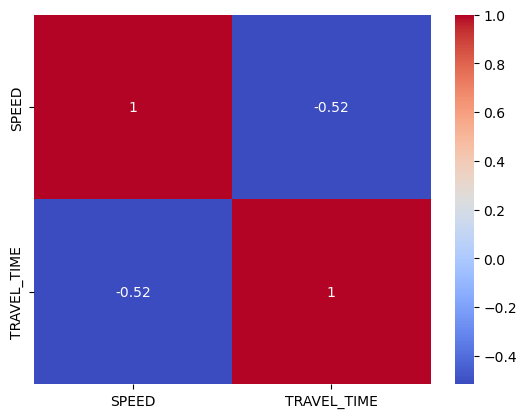

In [39]:
# Create a correlation matrix of the 'SPEED', 'TRAVEL_TIME', and 'TOTAL_DISTANCE' columns
corr = data[['SPEED', 'TRAVEL_TIME']].corr()

# Create a heatmap of the correlation matrix
sns.heatmap(corr, annot=True, cmap='coolwarm')

# Display the plot
plt.show()

__* Groups Buckets BucketWeights__

In [40]:
# Create a dictionary to map values to groups
group_dict = {'2': 'g2', '3': 'g3', '4': 'g4', '5': 'g5', '6': 'g6'}

# Add a new column 'Group' to the DataFrame using the map method
data['Group'] = data['MAX_LANES'].map(group_dict)
data['MAX_LANES'] = data['MAX_LANES'].astype(int)

# Print the first few rows of the DataFrame with the new 'Group' column
data.head()

,ID,SPEED,TRAVEL_TIME,BOROUGH,MAX_LANES,Group
0,349,0.00,0.00,Staten Island,2,g2
1,440,54.68,141.00,Staten Island,2,g2
2,349,0.00,0.00,Staten Island,2,g2
3,413,48.46,44.00,Brooklyn,2,g2
4,345,11.18,381.00,Bronx,2,g2


In [42]:
# define the bin intervals and labels
bins = [0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, float('inf')]
labels = ['b1j', 'b2j', 'b3j', 'b4j', 'b5j', 'b6j', 'b7j', 'b8j', 'b9j', 'b10j', 'out of bound']

# assign bucket labels based on speed and group
data['Bucket'] = pd.cut(data['SPEED'], bins=bins, labels=labels, right=False)
data['BucketWeights'] = data.groupby(['Group', 'Bucket'])['SPEED'].transform('count')
data.head()

,ID,SPEED,TRAVEL_TIME,BOROUGH,MAX_LANES,Group,Bucket,BucketWeights
0,349,0.00,0.00,Staten Island,2,g2,b1j,509
1,440,54.68,141.00,Staten Island,2,g2,out of bound,575
2,349,0.00,0.00,Staten Island,2,g2,b1j,509
3,413,48.46,44.00,Brooklyn,2,g2,b10j,284
4,345,11.18,381.00,Bronx,2,g2,b3j,174


In [43]:
# remove rows that are out of bounds
data = data.drop(index=data[data['Bucket'] == 'out of bound'].index)

# print the length of the resulting DataFrame
print(f"The length of the filtered data is {len(data)}.")

# display the first 5 rows of the filtered data
print("\nThe first 5 rows of the filtered data are:")
data.head()


The length of the filtered data is 9357.

The first 5 rows of the filtered data are:


,ID,SPEED,TRAVEL_TIME,BOROUGH,MAX_LANES,Group,Bucket,BucketWeights
0,349,0.00,0.00,Staten Island,2,g2,b1j,509
2,349,0.00,0.00,Staten Island,2,g2,b1j,509
3,413,48.46,44.00,Brooklyn,2,g2,b10j,284
4,345,11.18,381.00,Bronx,2,g2,b3j,174
6,413,47.84,44.00,Brooklyn,2,g2,b10j,284


In [45]:
# compute the average speeds for each bucket within each group
Bavsg = data.groupby(['Group', 'Bucket'])['SPEED'].mean().reset_index().rename(columns={'SPEED': 'Bavgs'})

# add a new column 'Bavgs' to the original dataframe with the average speeds
data = pd.merge(data, Bavsg, on=['Group', 'Bucket'], how='left')
data.head()



,ID,SPEED,TRAVEL_TIME,BOROUGH,MAX_LANES,Group,Bucket,BucketWeights,Bavgs
0,349,0.00,0.00,Staten Island,2,g2,b1j,509,1.43
1,349,0.00,0.00,Staten Island,2,g2,b1j,509,1.43
2,413,48.46,44.00,Brooklyn,2,g2,b10j,284,47.43
3,345,11.18,381.00,Bronx,2,g2,b3j,174,12.76
4,413,47.84,44.00,Brooklyn,2,g2,b10j,284,47.43


In [46]:
len(data)

9357

In [47]:
def plot_bucket_weights(group_name,data):
       
    # Filter the data by the given group name
    filtered_data = data.loc[data['Group'] == group_name]
    filtered_data = filtered_data.drop_duplicates(subset=['Bucket', 'BucketWeights'])

    # Get the unique buckets in the filtered data
    buckets = filtered_data['Bucket'].unique()

    # Get bucket weights as a list
    bucket_weights = [int(filtered_data.loc[filtered_data['Bucket'] == bucket]['BucketWeights'].mean()) for bucket in buckets]

    # Plot histogram
    plt.bar(buckets, bucket_weights)
    plt.xlabel('Bucket')
    plt.ylabel('Bucket Weight')
    plt.title('Histogram of Bucket Weights for Group ' + group_name)
    plt.show()

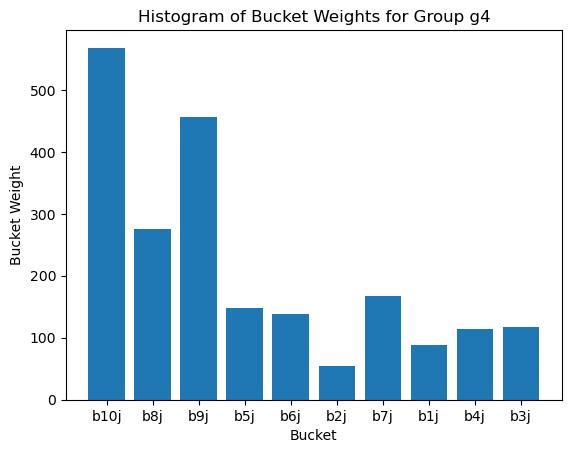

In [48]:
plot_bucket_weights('g4', data)

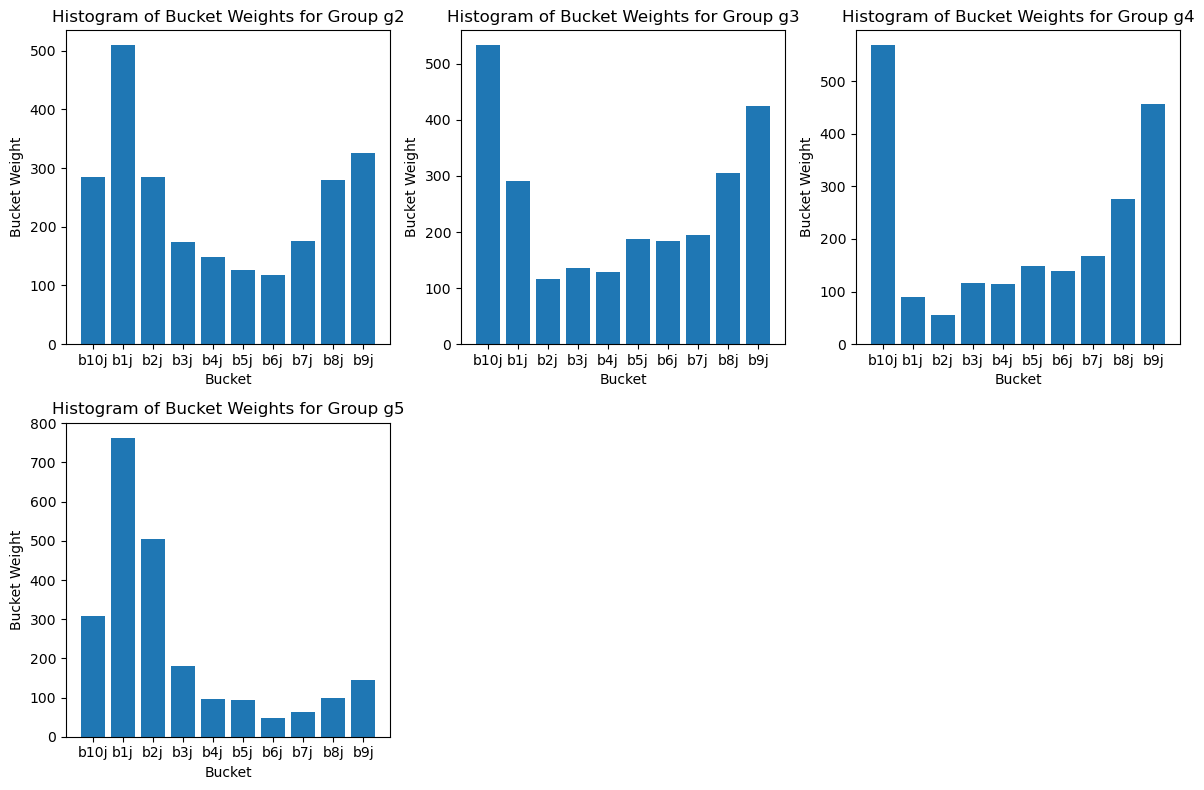

In [49]:
# Define a function to plot bucket weights for a given group
def plot_bucket_weights(group, data):
    # Filter the data by the group
    filtered_data = data.loc[data['Group'] == group]
    filtered_data = filtered_data.drop_duplicates(subset=['Bucket', 'BucketWeights'])

    # Get the unique buckets in the filtered data
    buckets = sorted(filtered_data['Bucket'].unique())

    # Get bucket weights as a list
    bucket_weights = [int(filtered_data.loc[filtered_data['Bucket'] == bucket]['BucketWeights'].mean()) for bucket in buckets]

    # Plot histogram
    ax = fig.add_subplot(2, 3, group_nums[group])
    ax.bar(buckets, bucket_weights)
    ax.set_xlabel('Bucket')
    ax.set_ylabel('Bucket Weight')
    ax.set_title(f'Histogram of Bucket Weights for Group {group}')

# Define the groups to plot
groups = ['g2', 'g3', 'g4', 'g5']

# Create a figure with subplots
fig = plt.figure(figsize=(12, 8))
group_nums = dict(zip(groups, range(1, len(groups)+1)))

# Plot the bucket weights for each group in its own subplot
for group in groups:
    plot_bucket_weights(group, data)

# Adjust the layout and show the plot
plt.tight_layout()
plt.show()



In [50]:
# Function to convert a strin                                                                       
def convert_to_lane_speeds(speeds_df, seed):
    # Set the random seed
    random.seed(seed)

    # Copy the speeds dataframe to avoid modifying the original
    lane_speeds_df = speeds_df.copy()
    # Iterate through each row of the dataframe
    for i, row in lane_speeds_df.iterrows():
        # Get the average speed for the road
        avg_speed = row['Bavgs']
        # Generate a random max speed for each lane
        lane_speeds = []
        for j in range(row['MAX_LANES']):
            limits = 0.4 * avg_speed
            max_speed = round(random.uniform(max(avg_speed - limits, 0), avg_speed + limits), 2)
            lane_speeds.append(max_speed)
        lane_speeds.sort()
        # Update the lane speeds for the row
        lane_speeds_df.at[i, 'LANE_SPEEDS'] = ','.join(map(str, lane_speeds))
        
    # string to float
    lane_speeds_df['LANE_SPEEDS'] = lane_speeds_df['LANE_SPEEDS'].apply(string_to_float_list)

    return lane_speeds_df

df = convert_to_lane_speeds(data, seed=123456767777666)
df.head()


,ID,SPEED,TRAVEL_TIME,BOROUGH,MAX_LANES,Group,Bucket,BucketWeights,Bavgs,LANE_SPEEDS
0,349,0.00,0.00,Staten Island,2,g2,b1j,509,1.43,"[1.21, 1.71]"
1,349,0.00,0.00,Staten Island,2,g2,b1j,509,1.43,"[1.22, 1.77]"
2,413,48.46,44.00,Brooklyn,2,g2,b10j,284,47.43,"[59.53, 61.23]"
3,345,11.18,381.00,Bronx,2,g2,b3j,174,12.76,"[9.54, 14.59]"
4,413,47.84,44.00,Brooklyn,2,g2,b10j,284,47.43,"[56.24, 63.94]"


In [52]:
def get_avg_lanespeeds(row):
    lane_speeds = row['LANE_SPEEDS']
    lane_speeds = [float(x) for x in lane_speeds]
    return sum(lane_speeds) / len(lane_speeds)

df['AvgRoadSpeed'] = df.apply(get_avg_lanespeeds, axis=1)

df.head()

,ID,SPEED,TRAVEL_TIME,BOROUGH,MAX_LANES,Group,Bucket,BucketWeights,Bavgs,LANE_SPEEDS,AvgRoadSpeed
0,349,0.00,0.00,Staten Island,2,g2,b1j,509,1.43,"[1.37, 1.97]",1.67
1,349,0.00,0.00,Staten Island,2,g2,b1j,509,1.43,"[0.87, 1.91]",1.39
2,413,48.46,44.00,Brooklyn,2,g2,b10j,284,47.43,"[50.55, 64.09]",57.32
3,345,11.18,381.00,Bronx,2,g2,b3j,174,12.76,"[8.51, 14.51]",11.51
4,413,47.84,44.00,Brooklyn,2,g2,b10j,284,47.43,"[37.44, 57.54]",47.49


In [53]:
counts = df.groupby(['Group', 'Bucket']).size().reset_index(name='Count')
print(counts)

   Group        Bucket  Count
0     g2           b1j    509
1     g2           b2j    284
2     g2           b3j    174
3     g2           b4j    149
4     g2           b5j    126
5     g2           b6j    118
6     g2           b7j    176
7     g2           b8j    279
8     g2           b9j    326
9     g2          b10j    284
10    g2  out of bound      0
11    g3           b1j    291
12    g3           b2j    116
13    g3           b3j    136
14    g3           b4j    129
15    g3           b5j    188
16    g3           b6j    184
17    g3           b7j    194
18    g3           b8j    306
19    g3           b9j    424
20    g3          b10j    533
21    g3  out of bound      0
22    g4           b1j     89
23    g4           b2j     55
24    g4           b3j    117
25    g4           b4j    114
26    g4           b5j    148
27    g4           b6j    139
28    g4           b7j    167
29    g4           b8j    276
30    g4           b9j    456
31    g4          b10j    568
32    g4  

In [54]:
counts_g3 = counts.loc[counts['Group'] == 'g3']
counts_g3

,Group,Bucket,Count
11,g3,b1j,291
12,g3,b2j,116
13,g3,b3j,136
14,g3,b4j,129
15,g3,b5j,188
16,g3,b6j,184
17,g3,b7j,194
18,g3,b8j,306
19,g3,b9j,424
20,g3,b10j,533


In [55]:
# LETS TAKE g3, b1j
desired_group = 'g3'
desired_bucket = 'b10j'
group_bucket_counts = counts.loc[(counts['Group'] == desired_group) & (counts['Bucket'] == desired_bucket)]
group_bucket_counts

,Group,Bucket,Count
20,g3,b10j,533


In [56]:
my_df = df.loc[(df['Group'] == desired_group) & (df['Bucket'] == desired_bucket)]
my_df.head()

,ID,SPEED,TRAVEL_TIME,BOROUGH,MAX_LANES,Group,Bucket,BucketWeights,Bavgs,LANE_SPEEDS,AvgRoadSpeed
2425,168,48.46,89.00,Bronx,3,g3,b10j,533,47.42,"[34.38, 41.91, 58.05]",44.78
2442,177,47.84,89.00,Bronx,3,g3,b10j,533,47.42,"[39.01, 48.31, 64.9]",50.74
2443,417,45.98,100.00,Brooklyn,3,g3,b10j,533,47.42,"[37.2, 57.85, 65.96]",53.67
2448,263,48.46,44.00,Brooklyn,3,g3,b10j,533,47.42,"[56.61, 58.69, 64.24]",59.85
2454,261,49.08,87.00,Brooklyn,3,g3,b10j,533,47.42,"[34.32, 52.57, 55.64]",47.51


In [57]:
sample = data[['MAX_LANES','Group', 'Bucket', 'BucketWeights', 'Bavgs']].groupby(['Group', 'Bucket']).mean().dropna().reset_index()
sample['MAX_LANES'] = sample['MAX_LANES'].astype(int)
sample.head()


,Group,Bucket,MAX_LANES,BucketWeights,Bavgs
0,g2,b1j,2,509.00,1.43
1,g2,b2j,2,284.00,7.60
2,g2,b3j,2,174.00,12.76
3,g2,b4j,2,149.00,17.59
4,g2,b5j,2,126.00,22.47


In [124]:
sample_df = convert_to_lane_speeds(sample, seed=1234)
sample_df.head()

,Group,Bucket,MAX_LANES,BucketWeights,Bavgs,LANE_SPEEDS
0,g2,b1j,2,509.00,1.43,"[1.37, 1.97]"
1,g2,b2j,2,284.00,7.60,"[4.6, 10.1]"
2,g2,b3j,2,174.00,12.76,"[13.59, 17.24]"
3,g2,b4j,2,149.00,17.59,"[11.73, 20.0]"
4,g2,b5j,2,126.00,22.47,"[17.74, 27.26]"


In [127]:
def get_avg_lanespeeds(row):
    lane_speeds = row['LANE_SPEEDS']
    lane_speeds = [float(x) for x in lane_speeds]
    return sum(lane_speeds) / len(lane_speeds)

sample_df['AvgRoadSpeed'] = sample_df.apply(get_avg_lanespeeds, axis=1)

sample_df.head()

,Group,Bucket,MAX_LANES,BucketWeights,Bavgs,LANE_SPEEDS,AvgRoadSpeed
0,g2,b1j,2,509.00,1.43,"[1.37, 1.97]",1.67
1,g2,b2j,2,284.00,7.60,"[4.6, 10.1]",7.35
2,g2,b3j,2,174.00,12.76,"[13.59, 17.24]",15.41
3,g2,b4j,2,149.00,17.59,"[11.73, 20.0]",15.87
4,g2,b5j,2,126.00,22.47,"[17.74, 27.26]",22.50


In [128]:
sample_df.head(40)

,Group,Bucket,MAX_LANES,BucketWeights,Bavgs,LANE_SPEEDS,AvgRoadSpeed
0,g2,b1j,2,509.00,1.43,"[1.37, 1.97]",1.67
1,g2,b2j,2,284.00,7.60,"[4.6, 10.1]",7.35
2,g2,b3j,2,174.00,12.76,"[13.59, 17.24]",15.41
3,g2,b4j,2,149.00,17.59,"[11.73, 20.0]",15.87
4,g2,b5j,2,126.00,22.47,"[17.74, 27.26]",22.50
5,g2,b6j,2,118.00,27.91,"[17.43, 34.36]",25.89
6,g2,b7j,2,176.00,32.85,"[28.8, 36.09]",32.45
7,g2,b8j,2,279.00,37.75,"[27.13, 41.24]",34.19
8,g2,b9j,2,326.00,42.55,"[29.43, 31.76]",30.59
9,g2,b10j,2,284.00,47.43,"[29.01, 46.92]",37.97


In [129]:
sample_df.to_csv(rf"required_dataframe.csv")

In [ ]:
# Function to convert a string of comma-separated floats to a list of floats
def string_to_float_list(s):
    return [float(x) for x in s.split(',')]

# Apply the function to the "LANE_SPEEDS" column
sample_df['LANE_SPEEDS'] = sample_df['LANE_SPEEDS'].apply(string_to_float_list)

In [ ]:
sample_df.head()

,Group,Bucket,MAX_LANES,BucketWeights,Bavgs,LANE_SPEEDS,AvgRoadSpeed
0,g2,b1j,2,509.00,1.43,"[1.37, 1.97]",1.67
1,g2,b2j,2,284.00,7.60,"[4.6, 10.1]",7.35
2,g2,b3j,2,174.00,12.76,"[13.59, 17.24]",15.41
3,g2,b4j,2,149.00,17.59,"[11.73, 20.0]",15.87
4,g2,b5j,2,126.00,22.47,"[17.74, 27.26]",22.50


In [ ]:
import pandas as pd

# Read the data from the table
data = sample_df

# Define a function to create the network file for each row
def create_network_file(data):
    # Iterate over each row
    for index, row in data.iterrows():
        # Extract the relevant values from the row
        group = row['Group']
        bucket = row['Bucket']
        max_lanes = row['MAX_LANES']
        lane_speeds = row['LANE_SPEEDS']
        AvgRoadSpeed = row['AvgRoadSpeed']
        
        # Create the net file string
        net_file = f'''<net xmlns:xsi="http://www.w3.org/2001/XMLSchema-instance" version="1.16" junctionCornerDetail="5" limitTurnSpeed="5.50" xsi:noNamespaceSchemaLocation="http://sumo.dlr.de/xsd/net_file.xsd">
        <location netOffset="0.00,0.00" convBoundary="0.00,0.00,2000.00,0.00" origBoundary="-10000000000.00,-10000000000.00,10000000000.00,10000000000.00" projParameter="!"/>
        <edge id="E0" from="J0" to="J1" priority="-1">
        '''
        
        # Add the lanes to the net file string
        for i in range(max_lanes):
            # Update the y-coordinate of the lane shape to increase with the lane index
            y = (i-1) * 3.2
            net_file += f'<lane id="E0_{i}" index="{i}" speed="{lane_speeds[i]}" length="2000.00" shape="0.00,{y} 2000.00,{y}"/>\n'
        
        # Add the junctions to the net file string
        net_file += f'<junction id="J0" type="dead_end" x="0.00" y="0.00" incLanes="" intLanes="" shape="0.00,0.00 0.00,{max_lanes*3.2}"/>\n'
        net_file += f'<junction id="J1" type="dead_end" x="2000.00" y="0.00" incLanes="{" ".join([f"E0_{i}" for i in range(max_lanes)])}" intLanes="" shape="2000.00,{max_lanes*3.2} 2000.00,0.00"/>\n'
        
        net_file += f'<vehicleTypes>'
        net_file += f'<vType id="bike" accel="3" decel="4.5" sigma="0.5" length="3.0" maxSpeed="20.0" guiShape="bicycle"/>'
        net_file += f'<vType id="car" accel="3.0" decel="3.0" sigma="0.5" length="5.0" maxSpeed="20.0" guiShape="passenger"/>'
        net_file += f'</vehicleTypes>'
        
        # Close the net file string
        net_file += '</edge>\n</net>'
        
        # Write the net file to disk
        with open(f'networks/{group}_{bucket}.net.xml', 'w') as f:
            f.write(net_file)

# Use apply() to create a network file for each row
create_network_file(data)
